# Machine Learning 2022-2023 - UMONS

# Regularization

In this lab, we'll experiment with two regularization methods, Ridge and Lasso. In the regression setting, given a training dataset $\mathcal{D} = \{(x_i,y_i)\}_{i=1}^n$, recall from the course that Ridge regression aims to find the coefficients $\beta_R$ that mimimize the following optimization problem:

$$\beta_R = \underset{\beta}{\text{argmin}} \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\right)^2 + \lambda \sum_{j=1}^p \beta_j^2$$

where $\lambda$ is a hyper-parameter controling the amount of shrinkage applied to the coefficients $\beta_j$. On the other hand, the Lasso regression coefficients are obtained from the following optimization problem :

$$ \beta_L = \underset{\beta}{\text{argmin}} \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\right)^2 + \lambda \sum_{j=1}^p |\beta_j|$$ 

In the binary classification setting, where $\mathcal{Y} = \{0,1\}$, ridge logistic regression aims instead to solve the following optimization problem:

$$\beta_R = \underset{\beta}{\text{argmin}}\left[-\text{log}~\mathcal{L(\boldsymbol{\beta};\mathcal{D})} + \lambda \sum_{j=1}^p \beta_j^2\right],$$

where $-\text{log}~\mathcal{L(\boldsymbol{\beta};\mathcal{D})}$ is the negative conditional log-likelihood, i.e.

$$-\text{log}~\mathcal{L(\boldsymbol{\beta};\mathcal{D})} = -\frac{1}{n} \sum_{i=1}^n y_i\text{log}~p(y_i=1|\boldsymbol{x}_i; \boldsymbol{\beta}) + (1-y_i)\text{log}~p(y_i=0|\boldsymbol{x}_i;\boldsymbol{\beta}),$$

with ${p(y_i=1|\boldsymbol{x}_i;\boldsymbol{\beta}) = \frac{e^{\boldsymbol{\beta}^\intercal \boldsymbol{x}_i}}{1 + e^{\boldsymbol{\beta}^\intercal \boldsymbol{x}_i}}}$ being a logistic regression classifier where $\boldsymbol{\beta}, \boldsymbol{x}_i \in \mathbb{R}^p$. Alternatively, Lasso logistic regression aims to minimize the following objective:

$$\beta_L = \underset{\beta}{\text{argmin}}\left[-\text{log}~\mathcal{L(\boldsymbol{\beta};\mathcal{D})} + \lambda \sum_{j=1}^p |\beta_j|\right]$$

The purpose of the lab is to better understand the influence of $\lambda$ on the fitted models, in both the regression and classification settings.

**Import the necessary libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    confusion_matrix,
    mean_squared_error,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

### Regularization in regression

**Use the code snippet below to generate some data points**

In [2]:
X, y, coef = datasets.make_regression(
    n_samples=100,  # number of samples
    n_features=5,  # number of features
    n_informative=5,  # number of useful features
    noise=10,  # standard deviation of the gaussian noise
    coef=True,  # true coefficient used to generated the data
    random_state=0,  # always create the same dataset
)

**1) Fit a ridge regression to the data for $\lambda$ varying between 1 and 2000 by steps of 1, and plot the evolution of the coefficients as a function of $\lambda$. What do you observe ? Redo the same operation for Lasso regression with $\lambda$ varying between 1 and 100.**

You will need to use the methods Ridge() and Lasso() from the scikit-learn library.

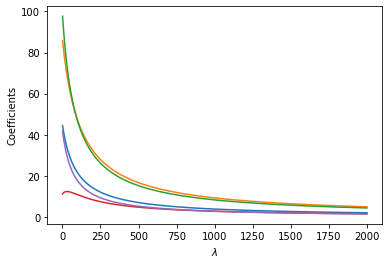

In [3]:
alpha_range = np.arange(1, 2000, 1)
coefficient_list = []
for alpha in alpha_range:
    model = Ridge(alpha=alpha, fit_intercept=True)
    model.fit(X, y)
    coefficient_list.append(model.coef_)

fig, ax = plt.subplots()
ax.plot(alpha_range, coefficient_list)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('Coefficients')
plt.show()

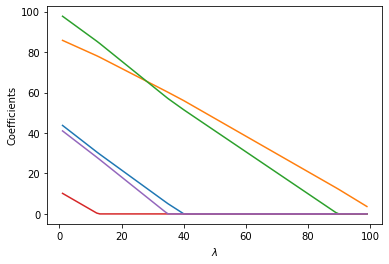

In [4]:
alpha_range = np.arange(1, 100, 1)
coefficient_list = []
for alpha in alpha_range:
    model = Lasso(alpha=alpha, fit_intercept=True)
    model.fit(X, y)
    coefficient_list.append(model.coef_)

fig, ax = plt.subplots()
ax.plot(alpha_range, coefficient_list)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('Coefficients')
plt.show()

The coefficients of ridge regression are shrunk towards 0 as $\lambda$ increases, without actually reaching it. On the other hand, the Lasso coefficients eventuallty reach 0. 

**2) Reuse the code snippet above to generate 100 samples with 90 features, with only 2 being informative on the response $y$. Split your dataset on a train and a test split using a 80/20 partition. For increasing values of $\lambda$ between 0.1 and 10 (by steps of 0.1), fit a ridge regression model on the training data and plot its MSE as a function of $\lambda$. What do you observe ? Do the same for a Lasso regression.** 

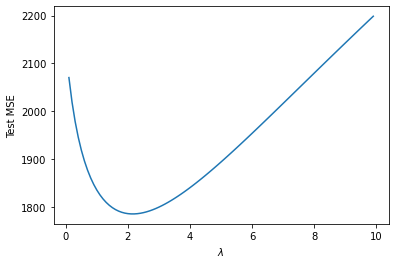

In [5]:
X, y, coef = datasets.make_regression(
    n_samples=100,  # number of samples
    n_features=90,  # number of features
    n_informative=2,  # number of useful features
    noise=10,  # bias and standard deviation of the guassian noise
    coef=True,  # true coefficient used to generated the data
    random_state=0,  # always create the same dataset
)

alpha_range = np.arange(0.1, 10, 0.1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0
)
mse_list_test = []
for alpha in alpha_range:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_list_test.append(mse_test)

fig, ax = plt.subplots()
ax.plot(alpha_range, mse_list_test)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('Test MSE')

plt.show()

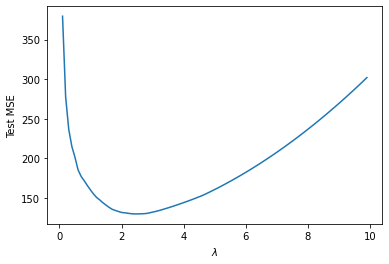

In [6]:
alpha_range = np.arange(0.1, 10, 0.1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0
)
mse_list_test = []
for alpha in alpha_range:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_list_test.append(mse_test)

fig, ax = plt.subplots()
ax.plot(alpha_range, mse_list_test)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('Test MSE')

plt.show()

For both Lasso and Ridge, the test error firstly decreases when $\lambda$ increases before increasing again. Increasing $\lambda$ has the effect of decreasing the variance of the model at the expense of an increased bias. For small values of $\lambda$, the decrease in variance is stronger than the increase in bias, resulting in a lower MSE. As $\lambda$ increases, the bias increases significantly, increasing the overall test error. 

**3) Use the code snippet below to simulate some data. Then, perform the following steps:**
- **Split your dataset into training and test sets following a 80/20 partition.**
- **For values of $\lambda$ in [0,10], perform a GridSearch cross-validation with CV=10 to identify the best value of $\lambda$ for both the Ridge and Lasso regression.**
    - **You'll need the GridSearchCV() method of scikit-learn for this step. Use the mean squared error as selection metric.**
    - **What is the best values $\lambda_R$ and $\lambda_L$ for Ridge and Lasso respectively?**
- **Using these best values of $\lambda_R$ and $\lambda_L$, refit the models to the full training set.**
- **Evaluate the training and test MSE using the fitted models, and compare it to the training and test MSE of a linear regression model fitted on all predictors.**
- **How many coefficients are non-zero for the Lasso regression?**

In [7]:
X, y, coef = datasets.make_regression(
    n_samples=500,  # number of samples
    n_features=350,  # number of features
    n_informative=2,  # number of useful features
    noise=5,  # bias and standard deviation of the guassian noise
    coef=True,  # true coefficient used to generated the data
    random_state=1,  # always create the same dataset
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0
)

alpha = np.arange(0.1, 10, 0.1)

model_ridge = Ridge(fit_intercept=True)
model_lasso = Lasso(fit_intercept=True)
model_regression = LinearRegression(fit_intercept=True)

grid_ridge_lasso = {'alpha': alpha}

reg_ridge = GridSearchCV(model_ridge, grid_ridge_lasso, scoring='neg_mean_squared_error', cv=10)
reg_lasso = GridSearchCV(model_lasso, grid_ridge_lasso, scoring='neg_mean_squared_error', cv=10)

reg_ridge.fit(X_train, y_train)
reg_lasso.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error')

In [8]:
print(reg_ridge.best_estimator_)
print(reg_lasso.best_estimator_)

Ridge(alpha=1.7000000000000002)
Lasso(alpha=0.6)


We have $\lambda_R = 1.7$, and $\lambda_L = 0.6$.

In [9]:
best_ridge = Ridge(alpha=1.7, fit_intercept=True)
best_lasso = Lasso(alpha=0.6, fit_intercept=True)

best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)
model_regression.fit(X_train, y_train)


y_pred_ridge_train = best_ridge.predict(X_train)
y_pred_lasso_train = best_lasso.predict(X_train)
y_pred_linear_regression_train = model_regression.predict(X_train)

y_pred_ridge_test = best_ridge.predict(X_test)
y_pred_lasso_test = best_lasso.predict(X_test)
y_pred_linear_regression_test = model_regression.predict(X_test)

mse_ridge_train = mean_squared_error(y_pred_ridge_train, y_train)
mse_lasso_train = mean_squared_error(y_pred_lasso_train, y_train)
mse_linear_regresion_train = mean_squared_error(y_pred_linear_regression_train, y_train)

mse_ridge_test = mean_squared_error(y_pred_ridge_test, y_test)
mse_lasso_test = mean_squared_error(y_pred_lasso_test, y_test)
mse_linear_regresion_test = mean_squared_error(y_pred_linear_regression_test, y_test)

print(f'Train MSE for Ridge regression : {mse_ridge_train}')
print(f'Train MSE for Lasso regression : {mse_lasso_train}')
print(f'Train MSE for Linear regression : {mse_linear_regresion_train}\n')

print(f'Test MSE for Ridge regression : {mse_ridge_test}')
print(f'Test MSE for Lasso regression : {mse_lasso_test}')
print(f'Test MSE for Linear regression : {mse_linear_regresion_test}')

Train MSE for Ridge regression : 4.040005792011644
Train MSE for Lasso regression : 24.642543718974757
Train MSE for Linear regression : 3.329034924452105

Test MSE for Ridge regression : 142.79593852475548
Test MSE for Lasso regression : 22.83123209695839
Test MSE for Linear regression : 177.65422857853926


The linear regression model fitted with all predictors overfits significantly, as shown by the large difference in MSE between the training and test sets. The Ridge regression also overfits, but less than the linear regression model. This is due to the shrinkage of the coefficients, which acts as a regulizer by decreasing the model's variance, and hence mitigates overfitting. The training and test MSE of the Lasso regression are very close to one another, which indicates a model with good generalization capabilities. In our case, the Lasso regression works best. 

In [10]:
coef_lasso = best_lasso.coef_

num_nonzeros_coeff = np.sum(coef_lasso != 0)

print(f'Number of non-zeros coefficients in Lasso regression : {num_nonzeros_coeff}')

Number of non-zeros coefficients in Lasso regression : 5


### Regularization in classification

**Use the code snippet below to generate a classification dataset.**

In [11]:
X, y = datasets.make_classification(
    n_samples=200,  # number of samples
    n_features=30,  # number of features
    n_informative=5,  # number of useful features
    random_state=0,
    weights=[0.8, 0.2],  # Proportion of samples per class.
)

**4) Using the data generated dataset above, apply the following steps:**
- **Split your dataset into training and test sets following a 80/20 partition.**
- **For values of $\lambda$ in [0,10], perform a GridSearch cross-validation with CV=10 to identify the best value of $\lambda$ for both the Ridge and Lasso logistic regression classifiers.**
    - **Check the arguments 'penalty' and 'C' of the LogisticRegression() method to define Ridge and Lasso classifiers. Select 'saga' as solver for Ridge and 'liblinear' as solver for Lasso.**
    - **You'll need the GridSearchCV() method of scikit-learn for this step. Use the accuracy as selection metric.**
    - **What is the best values $\lambda_R$ and $\lambda_L$ for Ridge and Lasso respectively?**
- **Using these best values of $\lambda_R$ and $\lambda_L$, refit the models to the full training set.**
- **Evaluate the training and test accuracy using the fitted models, and compare it to the training and test accuracy of a logistic regression model fitted on all predictors.**
    - **Use the 'saga' solver for the logistic regression model.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0, stratify=y
)

In [13]:
alpha = np.arange(0.1, 10, 0.1)

model_rc = LogisticRegression(fit_intercept=True, solver='saga', penalty='l2', max_iter=2000)
model_lc = LogisticRegression(fit_intercept=True, solver='liblinear', penalty='l1', max_iter=2000)

grid_ridge_lasso = {'C': alpha}

cl_ridge = GridSearchCV(model_rc, grid_ridge_lasso, scoring='accuracy', cv=10)

cl_lasso = GridSearchCV(model_lc, grid_ridge_lasso, scoring='accuracy', cv=10)

cl_ridge.fit(X_train, y_train)
cl_lasso.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=2000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='accuracy')

In [14]:
print(cl_ridge.best_estimator_)
print(cl_lasso.best_estimator_)

LogisticRegression(C=0.2, max_iter=2000, solver='saga')
LogisticRegression(C=0.2, max_iter=2000, penalty='l1', solver='liblinear')


In [15]:
best_ridge = LogisticRegression(fit_intercept=True, solver='saga', penalty='l2', C=0.2)
best_lasso = LogisticRegression(fit_intercept=True, solver='saga', penalty='l1', C=0.2)
model_lr = LogisticRegression(fit_intercept=True, solver='saga', penalty='none', max_iter=2000)

best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)
model_lr.fit(X_train, y_train)


y_pred_ridge_train = best_ridge.predict(X_train)
y_pred_lasso_train = best_lasso.predict(X_train)
y_pred_lr_train = model_lr.predict(X_train)

y_pred_ridge_test = best_ridge.predict(X_test)
y_pred_lasso_test = best_lasso.predict(X_test)
y_pred_lr_test = model_lr.predict(X_test)

accuracy_ridge_train = accuracy_score(y_pred_ridge_train, y_train)
accuracy_lasso_train = accuracy_score(y_pred_lasso_train, y_train)
accuracy_lr_train = accuracy_score(y_pred_lr_train, y_train)

accuracy_ridge_test = accuracy_score(y_pred_ridge_test, y_test)
accuracy_lasso_test = accuracy_score(y_pred_lasso_test, y_test)
accuracy_lr_test = accuracy_score(y_pred_lr_test, y_test)

print(f'Train MSE for Ridge classification : {accuracy_ridge_train}')
print(f'Train MSE for Lasso classification : {accuracy_lasso_train}')
print(f'Train MSE for Logistic regression : {accuracy_lr_train}\n')

print(f'Test MSE for Ridge classification : {accuracy_ridge_test}')
print(f'Test MSE for Lasso classification : {accuracy_lasso_test}')
print(f'Test MSE for Logistic regression : {accuracy_lr_test}')

Train MSE for Ridge classification : 0.9625
Train MSE for Lasso classification : 0.94375
Train MSE for Logistic regression : 0.975

Test MSE for Ridge classification : 0.9
Test MSE for Lasso classification : 0.925
Test MSE for Logistic regression : 0.85


/Users/tanguybosser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tanguybosser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Similarly to the regression setting, we mitigate the overfitting phenomenon using Ridge and Lasso logistic regression, which translates into a significant increase in test accuracy.

**5) For the Logistic regression, Ridge logistic regression and Lasso logistic regression, do:** 
- **Plot the confusion matrix of the test predictions. You'll the need the 'confusion_matrix()' and 'ConfusionMatrixDisplay() methods.**
- **Compute the True Positive Rate, False Positive Rate, True Negative Rate, False Negative Rate, and Precision of the models on the test set.**
    - **You can access the necessary quantities out of the confusion matrix.**

TPR : 0.625
FPR : 0.09375
TNR : 0.90625
FNR : 0.375
Precision : 0.625
TPR : 0.5
FPR : 0.0
TNR : 1.0
FNR : 0.5
Precision : 1.0
TPR : 0.625
FPR : 0.0
TNR : 1.0
FNR : 0.375
Precision : 1.0


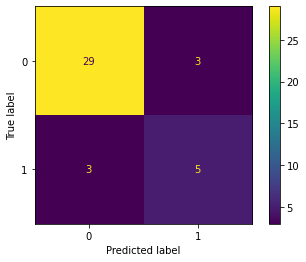

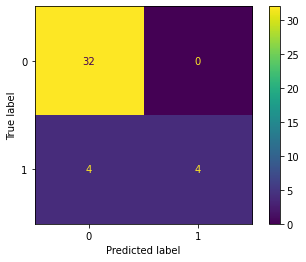

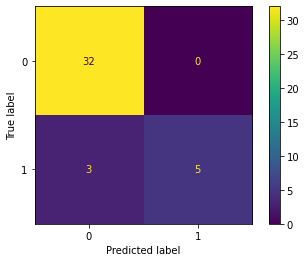

In [16]:
for y_pred_test in [y_pred_lr_test, y_pred_ridge_test, y_pred_lasso_test]:
    cm = confusion_matrix(y_test, y_pred_test)

    disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp_lr.plot()

    tn, fp, fn, tp = cm.ravel()

    tp_rate = tp / (tp + fn)
    fp_rate = fp / (tn + fp)
    tn_rate = tn / (tn + fp)
    fn_rate = fn / (tp + fn)
    precision = tp / (tp + fp)


    print(f'TPR : {tp_rate}')
    print(f'FPR : {fp_rate}')
    print(f'TNR : {tn_rate}')
    print(f'FNR : {fn_rate}')
    print(f'Precision : {precision}')

We have an imbalanced dataset, with only 20% of observations in the test set belonging to the positive class. Let's say our classifier only classifies observations to the negative class. In this case, the accuracy would be : $\text{Acc} = \frac{TP + TN}{N + P} = \frac{0 + 32}{40} = 0.8$. This means that, even if the model only predicts the '0' class, we'll get an accuracy of 80%, which can be highly misleading regarding the true performance of the model. The confusion matrix can give more insight regarding what's really happening behind the scenes. 

$TPR = \frac{TP}{TP + FN}$
* Amongst all the observations belonging the positive class, how many are correctly classified. 

$FPR = \frac{FP}{TN + FP}$ 
* Amongst all the observations belonging to the negative class, how many are wrongly classified as positive.

$TNR = \frac{TN}{TN + FP}$
* Amongst all the observations belonging to the negative class, how many are correctly classified as negative. 

$FNR = \frac{FN}{FN + TP}$
* Amongst all the observations belonging to the positive class, how many are wrongly classified as negative.

$\text{Precision} = \frac{TP}{TP + FP}$
* Amongst all the observations that are classified by the model as positive, 
how many are actually positive. 


**6) For the Logistic regression, Ridge logistic regression and Lasso logistic regression, do:**
- **Plot the ROC curve of the test predictions, and show the AUROC (Area Under the ROC curve) on the same figure.**
    - **Check the methods 'roc_curve()' and 'roc_auc_score()'.**

Text(0.5, 1.0, 'Receiver Operating Curvee')

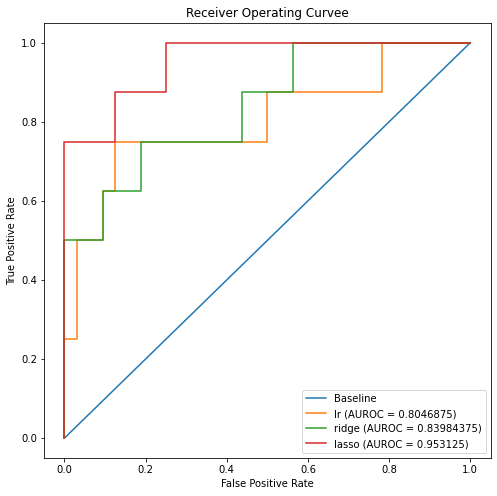

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
xaxis = np.arange(0, 1.1, 0.1)
ax.plot(xaxis, xaxis, label='Baseline')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

models = {
    'lr':model_lr,
    'ridge':best_ridge,
    'lasso':best_lasso
}

for model_name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_score)
    ax.plot(fpr, tpr, label=f'{model_name} (AUROC = {roc_auc})')
ax.legend()
ax.set_title('Receiver Operating Curvee')

A random model (i.e. a model that classifies observations randomly, meaning it has no predictive power) will have an AUC of 0.5, represented here by the blue line. As the AUC for all three models is greater than 0.5, and as the ROC is clearly above the baseline, we can conclude that the models have indeed predictive power. 

Adjusting for the threshold depends on the application at hand, and on the objective that we want to maximize. If capturing positive instances is more important than wrongly classifying negatives as positives, we'll increase the threshold. On the other hand, if we want to keep the FPR at a bare minimum, we'll decrease the threshold. Its a question of compromise.

As a side note, the AUROC can get below 0.5, meaning that the model performs even worse than a random classifier. 